In [1]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
PROC_TRAIN = "../data/processed/Train"

# Menyiapkan MobileNetV2 dengan pretrained weights
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [3]:
# Membekukan lapisan dari base model
for layer in base_model.layers:
    layer.trainable = False

# Menambahkan lapisan tambahan untuk klasifikasi
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(os.listdir(PROC_TRAIN)), activation='softmax')  # Jumlah kelas sesuai jumlah folder
])

In [4]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Menyiapkan Augmentasi Gambar untuk Pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    PROC_TRAIN,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

Found 267 images belonging to 70 classes.


In [5]:
# Membuat Model Checkpoint untuk menyimpan model terbaik
checkpoint = ModelCheckpoint(
    'best_model.h5', 
    monitor='accuracy', 
    save_best_only=True, 
    mode='max', 
    verbose=1
)

# Melatih model
history = model.fit(
    train_generator,
    epochs=10,
    callbacks=[checkpoint]
)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.0376 - loss: 4.6557
Epoch 1: accuracy improved from None to 0.05993, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 662ms/step - accuracy: 0.0599 - loss: 4.5666
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.2061 - loss: 3.4072
Epoch 2: accuracy improved from 0.05993 to 0.23596, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.2360 - loss: 3.3540
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.4784 - loss: 2.5261
Epoch 3: accuracy improved from 0.23596 to 0.48689, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 645ms/step - accuracy: 0.4869 - loss: 2.5061
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.5804 - loss: 1.9647
Epoch 4: accuracy improved from 0.48689 to 0.59551, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - accuracy: 0.5955 - loss: 1.9096
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.6219 - loss: 1.5549
Epoch 5: accuracy improved from 0.59551 to 0.62172, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 664ms/step - accuracy: 0.6217 - loss: 1.5889
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 660ms/step - accuracy: 0.7243 - loss: 1.3100
Epoch 6: accuracy improved from 0.62172 to 0.71536, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 687ms/step - accuracy: 0.7154 - loss: 1.2645
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.8048 - loss: 0.9386
Epoch 7: accuracy improved from 0.71536 to 0.79775, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 726ms/step - accuracy: 0.7978 - loss: 0.9612
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 735ms/step - accuracy: 0.8614 - loss: 0.7491
Epoch 8: accuracy improved from 0.79775 to 0.82397, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 761ms/step - accuracy: 0.8240 - loss: 0.8515
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 695ms/step - accuracy: 0.8528 - loss: 0.6958
Epoch 9: accuracy improved from 0.82397 to 0.83895, saving model to best_model.h5


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 722ms/step - accuracy: 0.8390 - loss: 0.7227
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 721ms/step - accuracy: 0.8523 - loss: 0.6589
Epoch 10: accuracy did not improve from 0.83895
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 722ms/step - accuracy: 0.8277 - loss: 0.7153


In [7]:
# Menyimpan model dalam format .h5
model.save('final_MobileNetV2_model.h5')

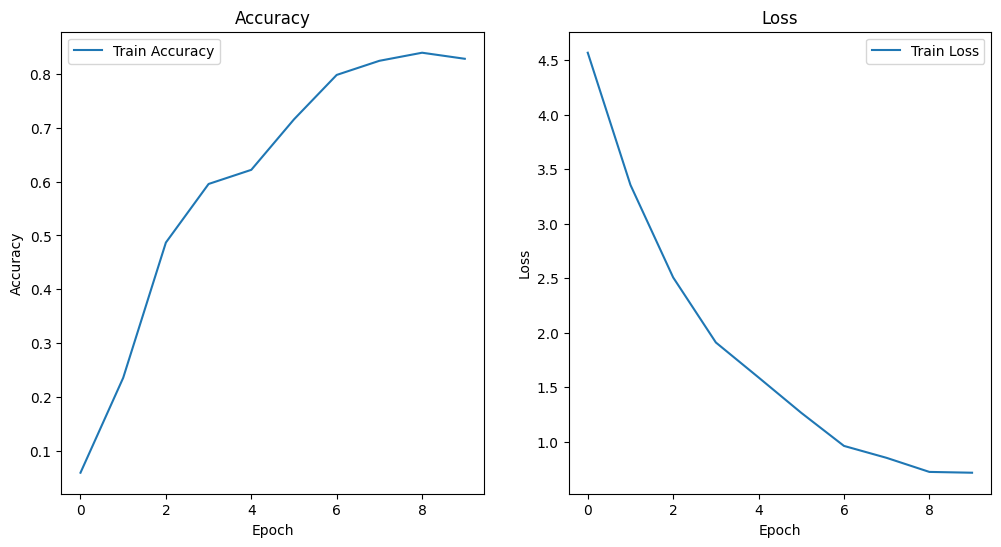

In [10]:
# Load model terbaik
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('final_MobileNetV2_model.h5')

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 6))

# Plotting Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## INFERENCE

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


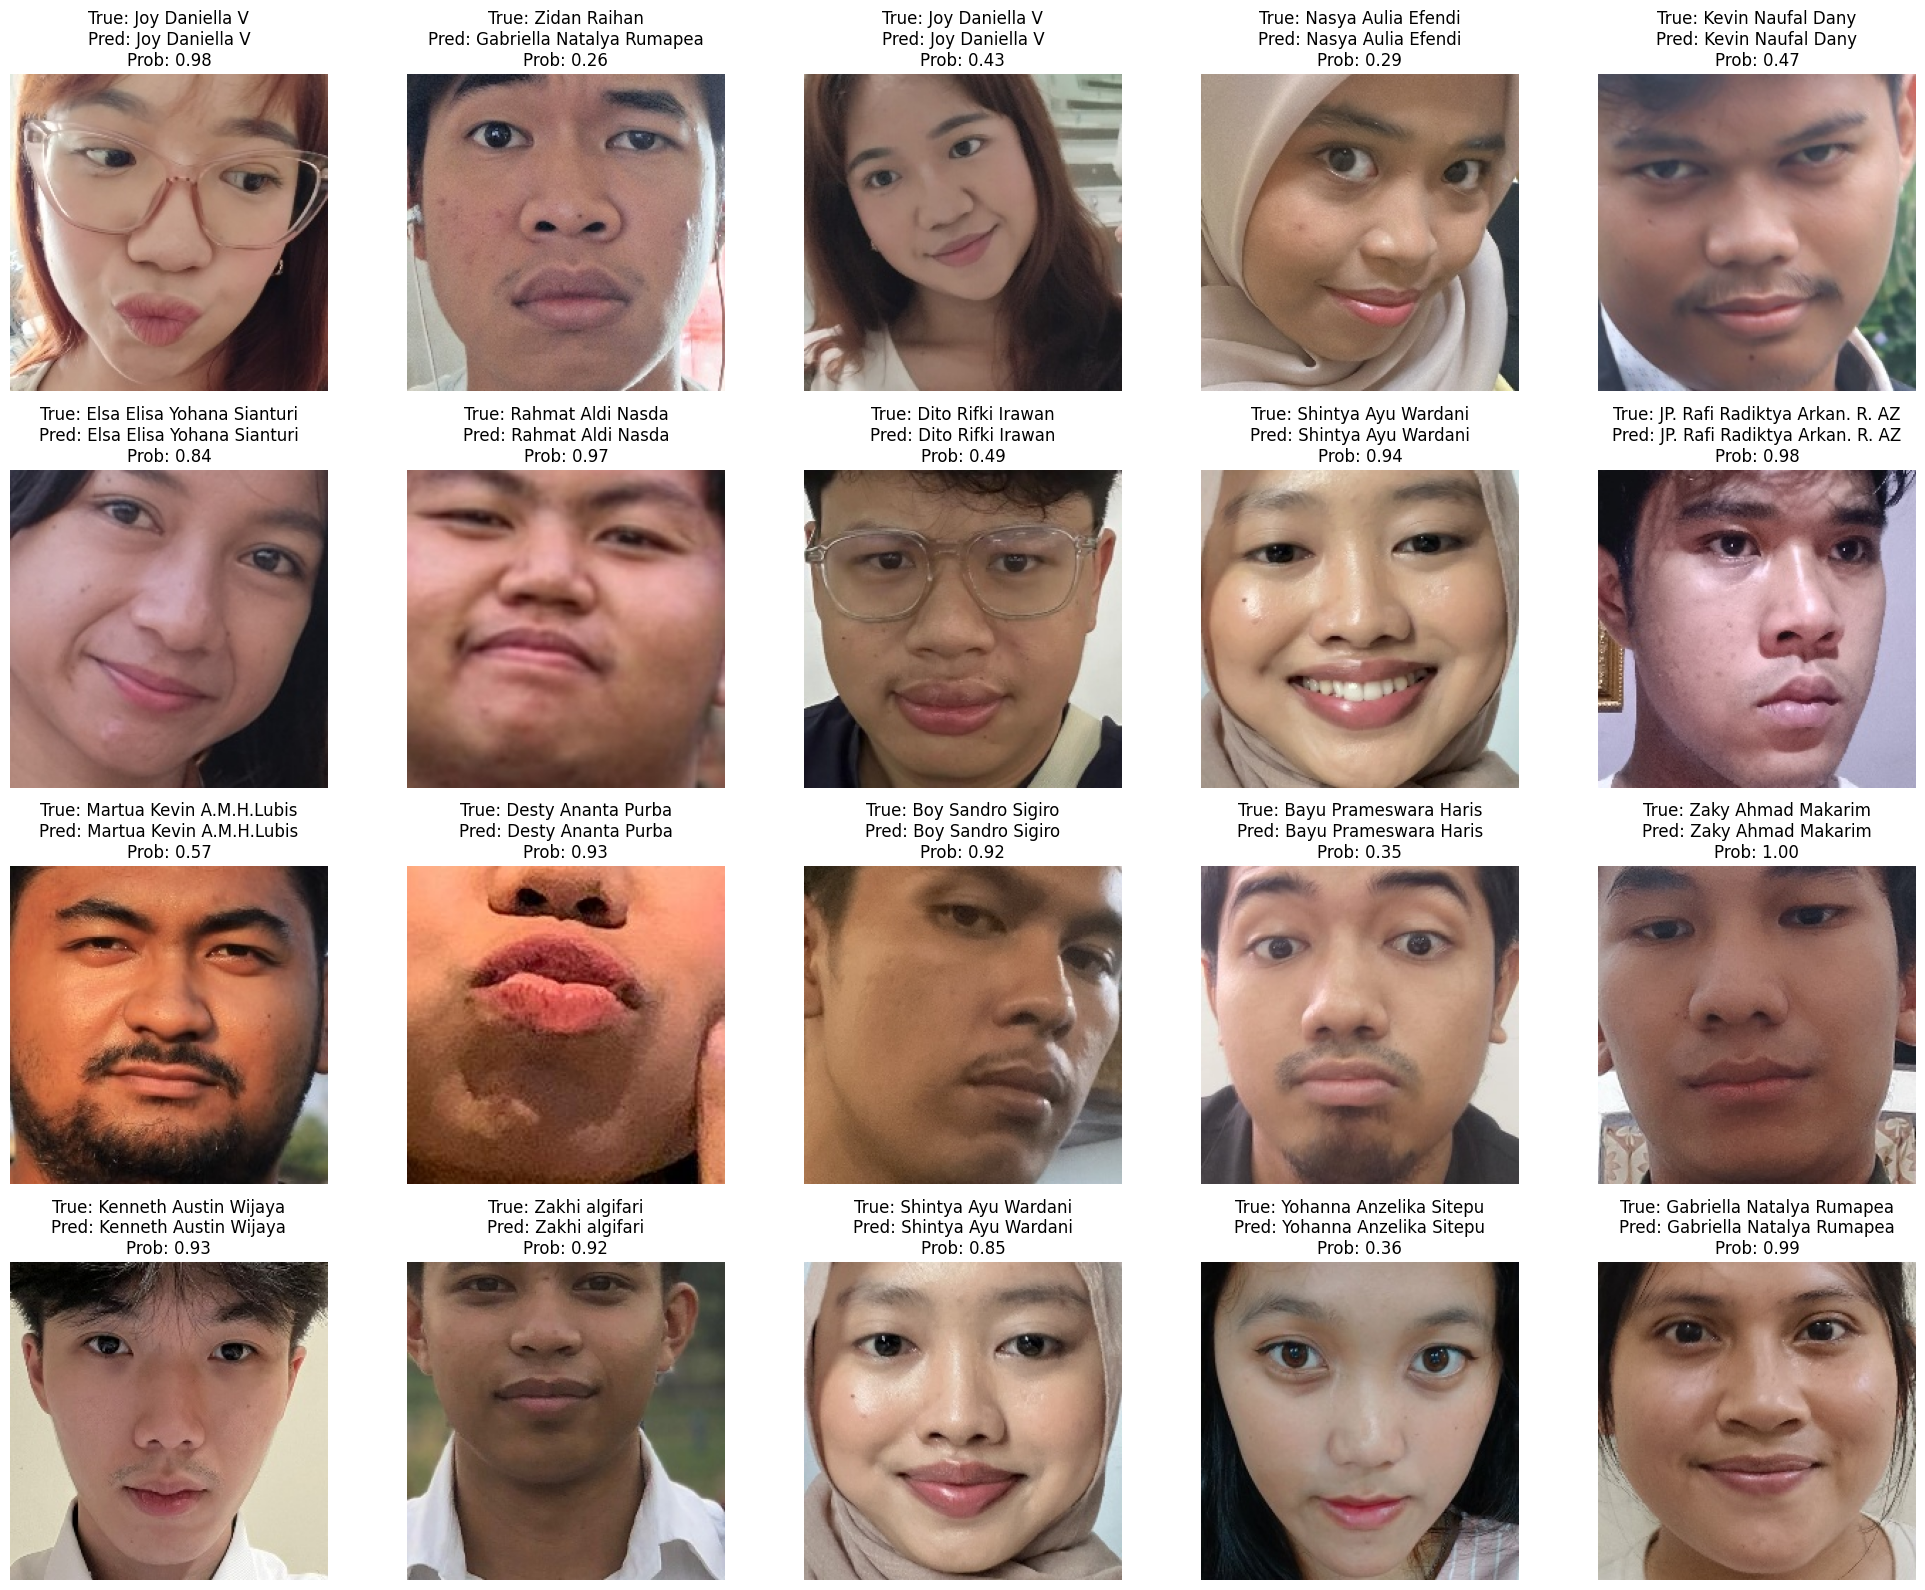

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from pathlib import Path

# Fungsi untuk memuat model dan memprediksi gambar
def predict_image(image_path, model):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalisasi
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    
    return predicted_class_index, prediction[0][predicted_class_index]

# Dapatkan nama kelas berdasarkan indeks dari train_generator
class_names = {v: k for k, v in train_generator.class_indices.items()}  # Kembalikan indeks ke nama kelas

# Ambil 20 gambar secara acak
image_paths = random.sample(list(Path(PROC_TRAIN).glob('*/*')), 20)  # Ambil 20 gambar acak dari dataset
true_labels = [str(image_path).split(os.sep)[-2] for image_path in image_paths]  # Nama kelas sebenarnya

# Inisialisasi grid plot
fig, axes = plt.subplots(4, 5, figsize=(20, 16))  # Membuat grid 4x5 untuk 20 gambar
axes = axes.ravel()

# Tampilkan 20 gambar dengan label dan prediksi
for i, img_path in enumerate(image_paths):
    # Prediksi gambar
    predicted_class_index, probability = predict_image(str(img_path), model)
    predicted_class_name = class_names[predicted_class_index]
    
    # Ambil gambar asli untuk ditampilkan
    img = load_img(str(img_path), target_size=(224, 224))
    
    # Plot gambar
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"True: {true_labels[i]}\nPred: {predicted_class_name}\nProb: {probability:.2f}")

# Tampilkan grid
plt.tight_layout()
plt.show()
